In [12]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from PR import *
import matplotlib.pyplot as plt

In [13]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=2, n_clusters_per_class=1,
                           n_samples=10000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [14]:
model = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
model.fit(X_train, y_train)
probe_predicts = model.predict_proba(X_test)

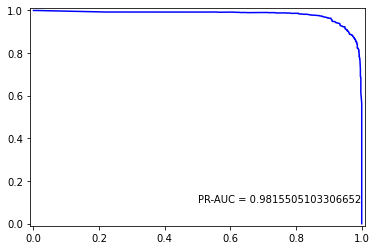

In [15]:
%matplotlib inline
pr(probe_predicts, y_test)

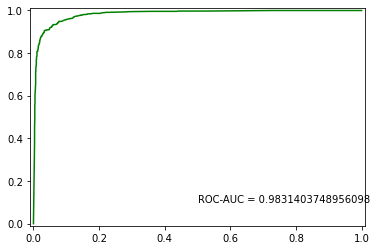

In [16]:
roc(probe_predicts, y_test)

SyntaxError: unexpected EOF while parsing (<ipython-input-17-3893ca768de4>, line 1)